# Movie Recommendation System Project in R

![](https://miro.medium.com/max/1000/1*BME1JjIlBEAI9BV5pOO5Mg.png)

# What is a Recommendation System?
- A recommendation system provides suggestions to the users through a filtering process that is based on user preferences and browsing history. 
- The information about the user is taken as an input. 
- The information is taken from the input that is in the form of browsing data. 
- This information reflects the prior usage of the product as well as the assigned ratings.
- A recommendation system is a platform that provides its users with various contents based on their preferences and likings.
- A recommendation system takes the information about the user as an input. 
- The recommendation system is an implementation of the machine learning algorithms.

- A recommendation system also finds a similarity between the different products.
- For example, Netflix Recommendation System provides you with the recommendations of the movies that are similar to the ones that have been watched in the past.
- Furthermore, there is a collaborative content filtering that provides you with the recommendations in respect with the other users who might have a similar viewing history or preferences. 
- There are two types of recommendation systems – Content-Based Recommendation System and Collaborative Filtering Recommendation.
- In this project of recommendation system in R, we will work on a collaborative filtering recommendation system and more specifically, ITEM based collaborative recommendation system.

In [1]:
# importing library

library(recommenderlab)
library(ggplot2)
library(data.table)
library(reshape2)

Loading required package: Matrix

Loading required package: arules


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write


Loading required package: proxy


Attaching package: ‘proxy’


The following object is masked from ‘package:Matrix’:

    as.matrix


The following objects are masked from ‘package:stats’:

    as.dist, dist


The following object is masked from ‘package:base’:

    as.matrix


Loading required package: registry

Registered S3 methods overwritten by 'registry':
  method               from 
  print.registry_field proxy
  print.registry_entry proxy


Attaching package: ‘reshape2’


The following objects are masked from ‘package:data.table’:

    dcast, melt




# Retrieving the Data
- We will now retrieve our data from movies.csv into movie_data dataframe and ratings.csv into rating_data. 
- We will use the str() function to display information about the movie_data dataframe.

In [2]:
movie_data <- read.csv("../input/top-movies/movies.csv",stringsAsFactors=FALSE)
rating_data <- read.csv("../input/movie-rating/ratings.csv")
str(movie_data)

'data.frame':	10329 obs. of  3 variables:
 $ movieId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ title  : chr  "Toy Story (1995)" "Jumanji (1995)" "Grumpier Old Men (1995)" "Waiting to Exhale (1995)" ...
 $ genres : chr  "Adventure|Animation|Children|Comedy|Fantasy" "Adventure|Children|Fantasy" "Comedy|Romance" "Comedy|Drama|Romance" ...


- We can overview the summary of the movies using the summary() function. We will also use the head() function to print the first six lines of movie_data

In [3]:
summary(movie_data)

    movieId          title              genres         
 Min.   :     1   Length:10329       Length:10329      
 1st Qu.:  3240   Class :character   Class :character  
 Median :  7088   Mode  :character   Mode  :character  
 Mean   : 31924                                        
 3rd Qu.: 59900                                        
 Max.   :149532                                        

In [4]:
head(movie_data)

movieId title                             
1 1       Toy Story (1995)                  
2 2       Jumanji (1995)                    
3 3       Grumpier Old Men (1995)           
4 4       Waiting to Exhale (1995)          
5 5       Father of the Bride Part II (1995)
6 6       Heat (1995)                       
  genres                                     
1 Adventure|Animation|Children|Comedy|Fantasy
2 Adventure|Children|Fantasy                 
3 Comedy|Romance                             
4 Comedy|Drama|Romance                       
5 Comedy                                     
6 Action|Crime|Thriller

- Similarly, we can output the summary as well as the first six lines of the ‘rating_data’ dataframe 

In [5]:
summary(rating_data) 

     userId         movieId           rating        timestamp        
 Min.   :  1.0   Min.   :     1   Min.   :0.500   Min.   :8.286e+08  
 1st Qu.:192.0   1st Qu.:  1073   1st Qu.:3.000   1st Qu.:9.711e+08  
 Median :383.0   Median :  2497   Median :3.500   Median :1.115e+09  
 Mean   :364.9   Mean   : 13381   Mean   :3.517   Mean   :1.130e+09  
 3rd Qu.:557.0   3rd Qu.:  5991   3rd Qu.:4.000   3rd Qu.:1.275e+09  
 Max.   :668.0   Max.   :149532   Max.   :5.000   Max.   :1.452e+09  

In [6]:
head(rating_data)

userId movieId rating timestamp 
1 1       16     4.0    1217897793
2 1       24     1.5    1217895807
3 1       32     4.0    1217896246
4 1       47     4.0    1217896556
5 1       50     4.0    1217896523
6 1      110     4.0    1217896150

# Data Pre-processing
- From the above table, we observe that the userId column, as well as the movieId column, consist of integers.
- Furthermore, we need to convert the genres present in the movie_data dataframe into a more usable format by the users.
- In order to do so, we will first create a one-hot encoding to create a matrix that comprises of corresponding genres for each of the films.

In [7]:
movie_genre <- as.data.frame(movie_data$genres, stringsAsFactors=FALSE)
library(data.table)
movie_genre2 <- as.data.frame(tstrsplit(movie_genre[,1], '[|]', 
                                   type.convert=TRUE), 
                         stringsAsFactors=FALSE) #DataFlair
colnames(movie_genre2) <- c(1:10)

list_genre <- c("Action", "Adventure", "Animation", "Children", 
                "Comedy", "Crime","Documentary", "Drama", "Fantasy",
                "Film-Noir", "Horror", "Musical", "Mystery","Romance",
                "Sci-Fi", "Thriller", "War", "Western")
genre_mat1 <- matrix(0,10330,18)
genre_mat1[1,] <- list_genre
colnames(genre_mat1) <- list_genre

for (index in 1:nrow(movie_genre2)) {
  for (col in 1:ncol(movie_genre2)) {
    gen_col = which(genre_mat1[1,] == movie_genre2[index,col]) #Author DataFlair
    genre_mat1[index+1,gen_col] <- 1
}
}
genre_mat2 <- as.data.frame(genre_mat1[-1,], stringsAsFactors=FALSE) #remove first row, which was the genre list
for (col in 1:ncol(genre_mat2)) {
  genre_mat2[,col] <- as.integer(genre_mat2[,col]) #convert from characters to integers
} 
str(genre_mat2)

'data.frame':	10329 obs. of  18 variables:
 $ Action     : int  0 0 0 0 0 1 0 0 1 1 ...
 $ Adventure  : int  1 1 0 0 0 0 0 1 0 1 ...
 $ Animation  : int  1 0 0 0 0 0 0 0 0 0 ...
 $ Children   : int  1 1 0 0 0 0 0 1 0 0 ...
 $ Comedy     : int  1 0 1 1 1 0 1 0 0 0 ...
 $ Crime      : int  0 0 0 0 0 1 0 0 0 0 ...
 $ Documentary: int  0 0 0 0 0 0 0 0 0 0 ...
 $ Drama      : int  0 0 0 1 0 0 0 0 0 0 ...
 $ Fantasy    : int  1 1 0 0 0 0 0 0 0 0 ...
 $ Film-Noir  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Horror     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Musical    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Mystery    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Romance    : int  0 0 1 1 0 0 1 0 0 0 ...
 $ Sci-Fi     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Thriller   : int  0 0 0 0 0 1 0 0 0 1 ...
 $ War        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Western    : int  0 0 0 0 0 0 0 0 0 0 ...


- In the next step of Data Pre-processing of R project, we will create a ‘search matrix’ that will allow us to perform an easy search of the films by specifying the genre present in our list.

In [8]:
SearchMatrix <- cbind(movie_data[,1:2], genre_mat2[])
head(SearchMatrix)    #DataFlair

movieId title                              Action Adventure Animation
1 1       Toy Story (1995)                   0      1         1        
2 2       Jumanji (1995)                     0      1         0        
3 3       Grumpier Old Men (1995)            0      0         0        
4 4       Waiting to Exhale (1995)           0      0         0        
5 5       Father of the Bride Part II (1995) 0      0         0        
6 6       Heat (1995)                        1      0         0        
  Children Comedy Crime Documentary Drama Fantasy Film-Noir Horror Musical
1 1        1      0     0           0     1       0         0      0      
2 1        0      0     0           0     1       0         0      0      
3 0        1      0     0           0     0       0         0      0      
4 0        1      0     0           1     0       0         0      0      
5 0        1      0     0           0     0       0         0      0      
6 0        0      1     0           0     0       0         0      0      
  Mystery Romance Sci-Fi Thriller War Western
1 0       0       0      0        0   0      
2 0       0       0      0        0   0      
3 0       1       0      0        0   0      
4 0       1       0      0        0   0      
5 0       0       0      0        0   0      
6 0       0       0      1        0   0

- There are movies that have several genres, for example, Toy Story, which is an animated film also falls under the genres of Comedy, Fantasy, and Children. This applies to the majority of the films.

- For our movie recommendation system to make sense of our ratings through recommenderlabs, we have to convert our matrix into a sparse matrix one. This new matrix is of the class ‘realRatingMatrix’. This is performed as follows:

In [9]:
ratingMatrix <- dcast(rating_data, userId~movieId, value.var = "rating", na.rm=FALSE)
ratingMatrix <- as.matrix(ratingMatrix[,-1]) #remove userIds
#Convert rating matrix into a recommenderlab sparse matrix
ratingMatrix <- as(ratingMatrix, "realRatingMatrix")
ratingMatrix

668 x 10325 rating matrix of class ‘realRatingMatrix’ with 105339 ratings.

- Let us now overview some of the important parameters that provide us various options for building recommendation systems for movies-

In [10]:
recommendation_model <- recommenderRegistry$get_entries(dataType = "realRatingMatrix")
names(recommendation_model)

[1] "HYBRID_realRatingMatrix"       "ALS_realRatingMatrix"         
 [3] "ALS_implicit_realRatingMatrix" "IBCF_realRatingMatrix"        
 [5] "LIBMF_realRatingMatrix"        "POPULAR_realRatingMatrix"     
 [7] "RANDOM_realRatingMatrix"       "RERECOMMEND_realRatingMatrix" 
 [9] "SVD_realRatingMatrix"          "SVDF_realRatingMatrix"        
[11] "UBCF_realRatingMatrix"

In [11]:
lapply(recommendation_model, "[[", "description")

$HYBRID_realRatingMatrix
[1] "Hybrid recommender that aggegates several recommendation strategies using weighted averages."

$ALS_realRatingMatrix
[1] "Recommender for explicit ratings based on latent factors, calculated by alternating least squares algorithm."

$ALS_implicit_realRatingMatrix
[1] "Recommender for implicit data based on latent factors, calculated by alternating least squares algorithm."

$IBCF_realRatingMatrix
[1] "Recommender based on item-based collaborative filtering."

$LIBMF_realRatingMatrix
[1] "Matrix factorization with LIBMF via package recosystem (https://cran.r-project.org/web/packages/recosystem/vignettes/introduction.html)."

$POPULAR_realRatingMatrix
[1] "Recommender based on item popularity."

$RANDOM_realRatingMatrix
[1] "Produce random recommendations (real ratings)."

$RERECOMMEND_realRatingMatrix
[1] "Re-recommends highly rated items (real ratings)."

$SVD_realRatingMatrix
[1] "Recommender based on SVD approximation with column-mean imputation."

$SVDF_realRatingMatrix
[1] "Recommender based on Funk SVD with gradient descend (https://sifter.org/~simon/journal/20061211.html)."

$UBCF_realRatingMatrix
[1] "Recommender based on user-based collaborative filtering."

- We will implement a single model in our R project – Item Based Collaborative Filtering.

In [12]:
recommendation_model$IBCF_realRatingMatrix$parameters

$k
[1] 30

$method
[1] "Cosine"

$normalize
[1] "center"

$normalize_sim_matrix
[1] FALSE

$alpha
[1] 0.5

$na_as_zero
[1] FALSE

# Exploring Similar Data
- Collaborative Filtering involves suggesting movies to the users that are based on collecting preferences from many other users. For example, if a user A likes to watch action films and so does user B, then the movies that the user B will watch in the future will be recommended to A and vice-versa. Therefore, recommending movies is dependent on creating a relationship of similarity between the two users. With the help of recommenderlab, we can compute similarities using various operators like cosine, pearson as well as jaccard.

In [13]:
similarity_mat <- similarity(ratingMatrix[1:4, ],
                               method = "cosine",
                               which = "users")
as.matrix(similarity_mat)

1         2         3         4        
1 0.0000000 0.9760860 0.9641723 0.9914398
2 0.9760860 0.0000000 0.9925732 0.9374253
3 0.9641723 0.9925732 0.0000000 0.9888968
4 0.9914398 0.9374253 0.9888968 0.0000000

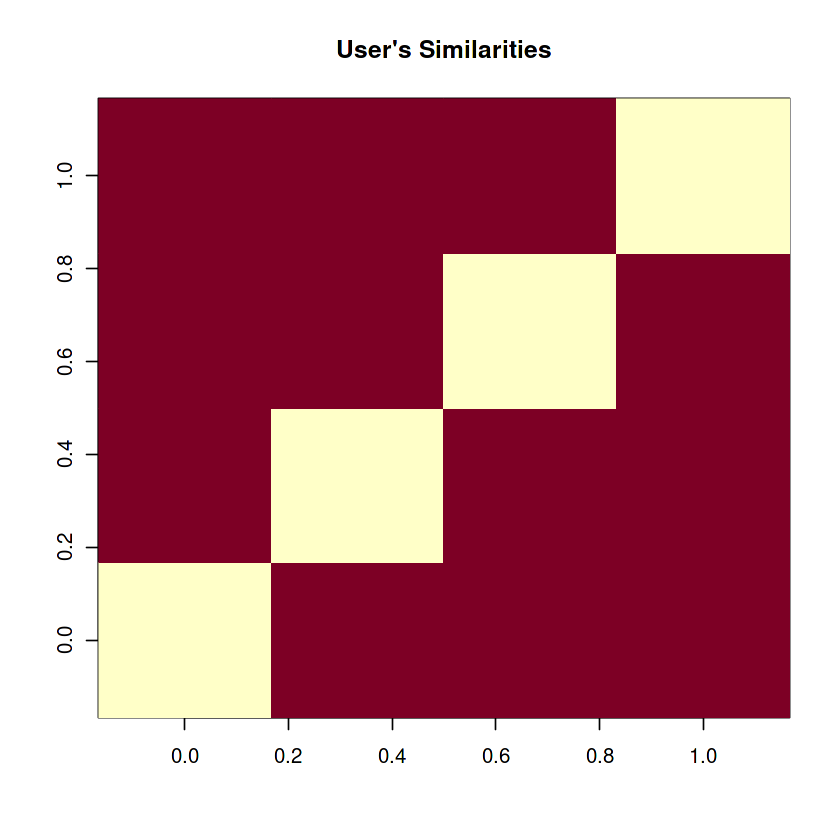

In [14]:
image(as.matrix(similarity_mat), main = "User's Similarities")

- In the above matrix, each row and column represents a user. We have taken four users and each cell in this matrix represents the similarity that is shared between the two users.

Now, we delineate the similarity that is shared between the films –

1         2         3         4        
1 0.0000000 0.9669732 0.9559341 0.9101276
2 0.9669732 0.0000000 0.9658757 0.9412416
3 0.9559341 0.9658757 0.0000000 0.9864877
4 0.9101276 0.9412416 0.9864877 0.0000000

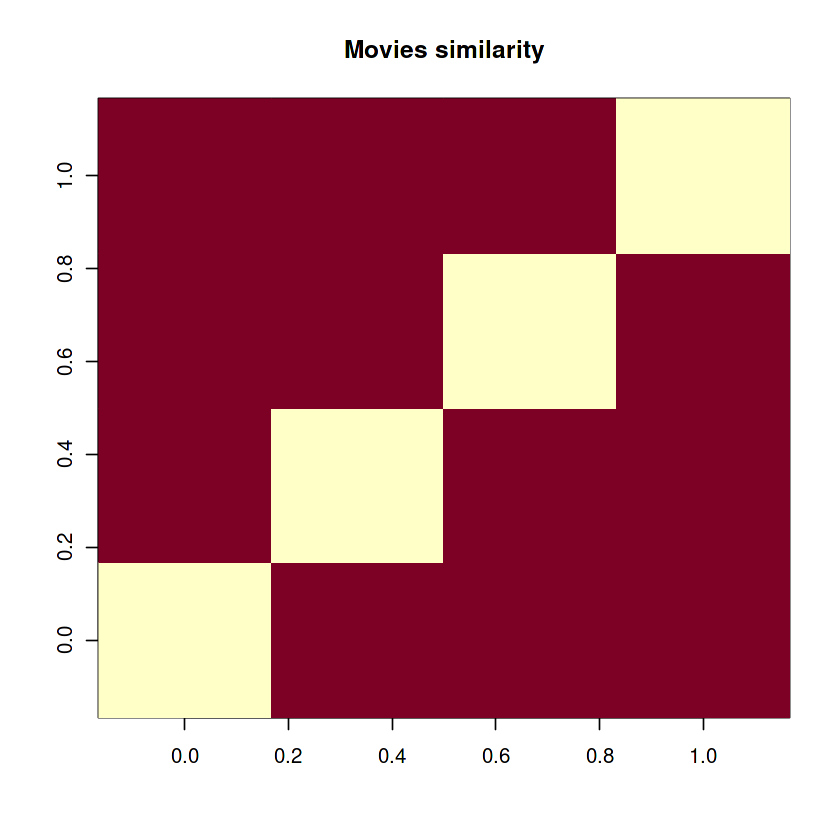

In [15]:
movie_similarity <- similarity(ratingMatrix[, 1:4], method =
                                 "cosine", which = "items")
as.matrix(movie_similarity)

image(as.matrix(movie_similarity), main = "Movies similarity")

- Let us now extract the most unique ratings –

In [16]:
rating_values <- as.vector(ratingMatrix@data)
unique(rating_values) 

[1] 0.0 5.0 4.0 3.0 4.5 1.5 2.0 3.5 1.0 2.5 0.5

- Now, we will create a table of ratings that will display the most unique ratings.

In [17]:
Table_of_Ratings <- table(rating_values) # creating a count of movie ratings
Table_of_Ratings

rating_values
      0     0.5       1     1.5       2     2.5       3     3.5       4     4.5 
6791761    1198    3258    1567    7943    5484   21729   12237   28880    8187 
      5 
  14856 

# Most Viewed Movies Visualization
- In this section of the machine learning project, we will explore the most viewed movies in our dataset. We will first count the number of views in a film and then organize them in a table that would group them in descending order.

In [18]:
library(ggplot2)
movie_views <- colCounts(ratingMatrix) # count views for each movie
table_views <- data.frame(movie = names(movie_views),
                          views = movie_views) # create dataframe of views
table_views <- table_views[order(table_views$views,
                                 decreasing = TRUE), ] # sort by number of views
table_views$title <- NA
for (index in 1:10325){
  table_views[index,3] <- as.character(subset(movie_data,
                                         movie_data$movieId == table_views[index,1])$title)
}
table_views[1:6,]

movie views title                                    
296 296   325   Pulp Fiction (1994)                      
356 356   311   Forrest Gump (1994)                      
318 318   308   Shawshank Redemption, The (1994)         
480 480   294   Jurassic Park (1993)                     
593 593   290   Silence of the Lambs, The (1991)         
260 260   273   Star Wars: Episode IV - A New Hope (1977)

- Now, we will visualize a bar plot for the total number of views of the top films. We will carry this out using ggplot2.

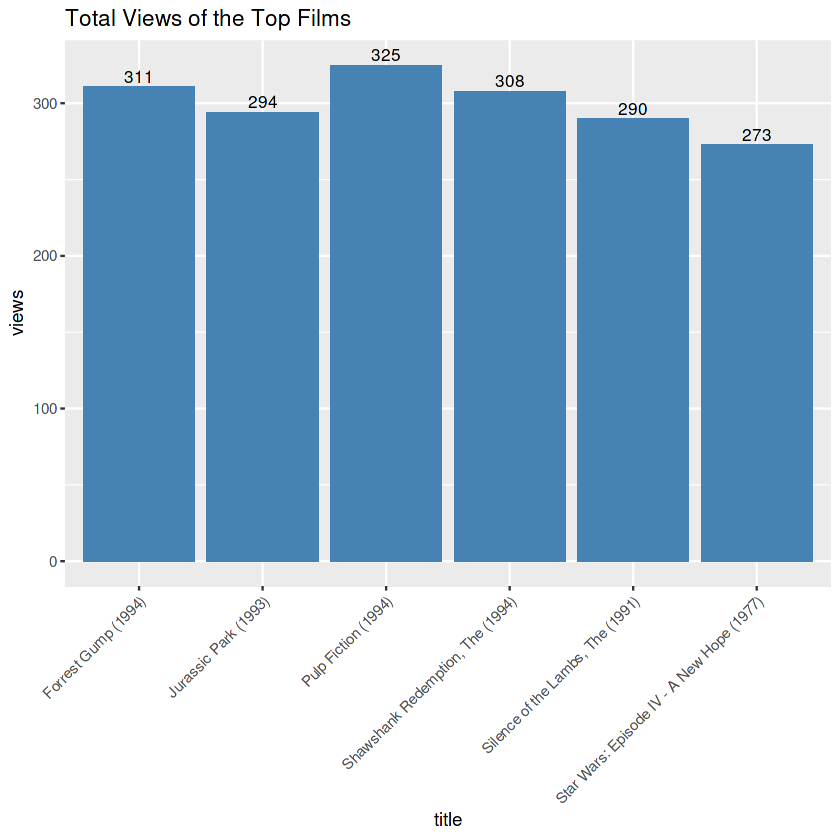

In [19]:
ggplot(table_views[1:6, ], aes(x = title, y = views)) +
  geom_bar(stat="identity", fill = 'steelblue') +
  geom_text(aes(label=views), vjust=-0.3, size=3.5) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +

  ggtitle("Total Views of the Top Films")

- From the above bar-plot, we observe that Pulp Fiction is the most-watched film followed by Forrest Gump.

# Heatmap of Movie Ratings
- Now, in this data science project of Recommendation system, we will visualize a heatmap of the movie ratings. This heatmap will contain first 25 rows and 25 columns as follows –

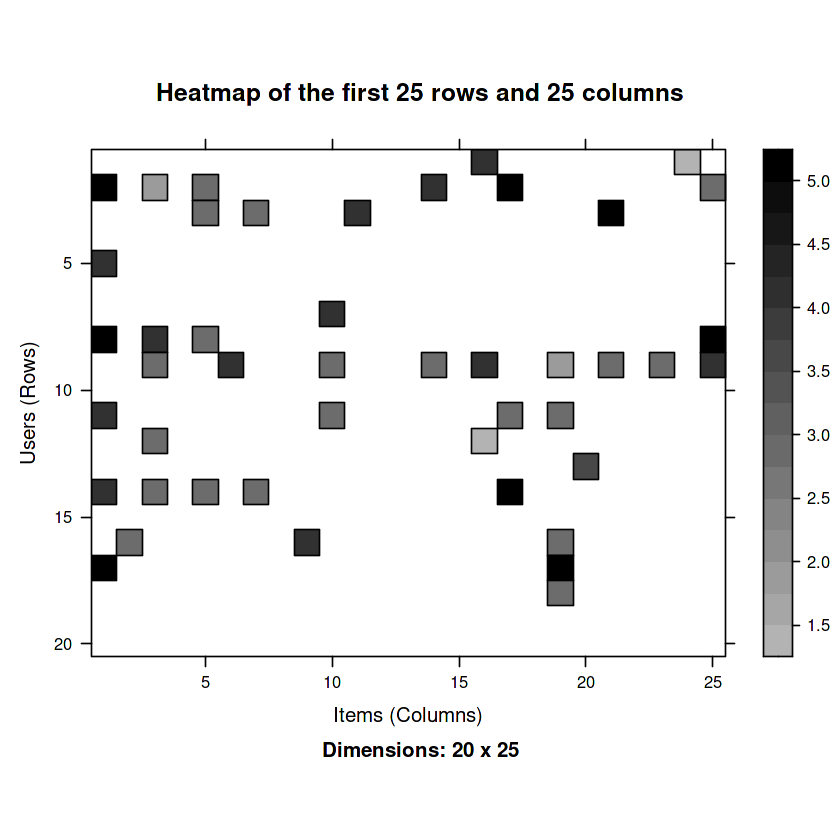

In [20]:
image(ratingMatrix[1:20, 1:25], axes = FALSE, main = "Heatmap of the first 25 rows and 25 columns")

# Performing Data Preparation
We will conduct data preparation in the following three steps –

- Selecting useful data.
- Normalizing data.
- Binarizing the data.

For finding useful data in our dataset, we have set the threshold for the minimum number of users who have rated a film as 50. This is also same for minimum number of views that are per film. This way, we have filtered a list of watched films from least-watched ones.

In [21]:
movie_ratings <- ratingMatrix[rowCounts(ratingMatrix) > 50,
                             colCounts(ratingMatrix) > 50]
movie_ratings

420 x 447 rating matrix of class ‘realRatingMatrix’ with 38341 ratings.

- From the above output of ‘movie_ratings’, we observe that there are 420 users and 447 films as opposed to the previous 668 users and 10325 films. We can now delineate our matrix of relevant users as follows –

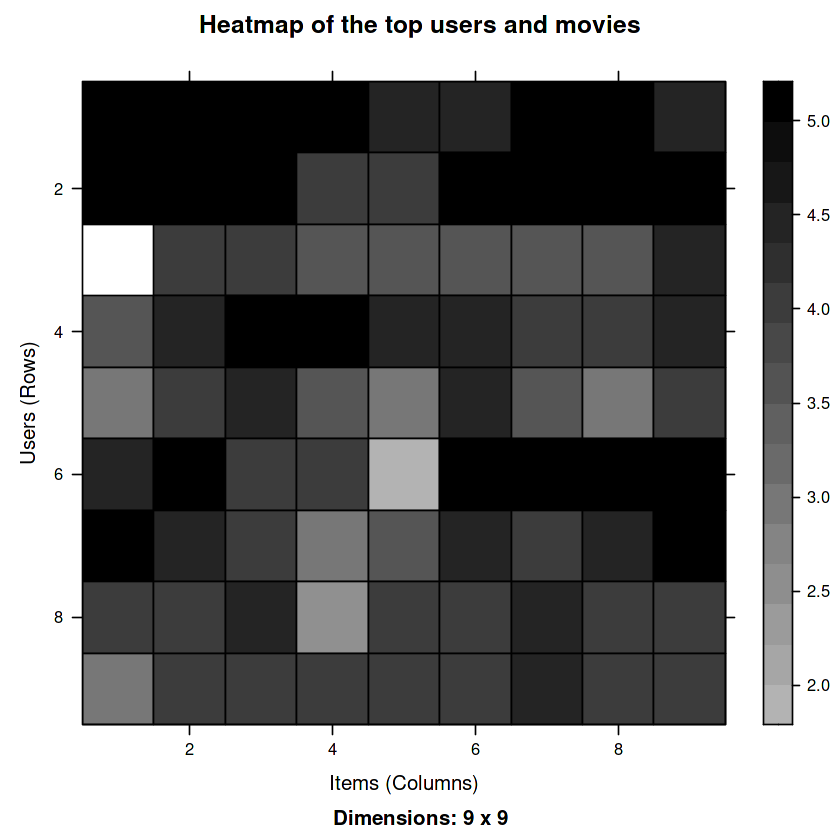

In [22]:
minimum_movies<- quantile(rowCounts(movie_ratings), 0.98)
minimum_users <- quantile(colCounts(movie_ratings), 0.98)
image(movie_ratings[rowCounts(movie_ratings) > minimum_movies,
                     colCounts(movie_ratings) > minimum_users],
main = "Heatmap of the top users and movies")

- Now, we will visualize the distribution of the average ratings per user.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



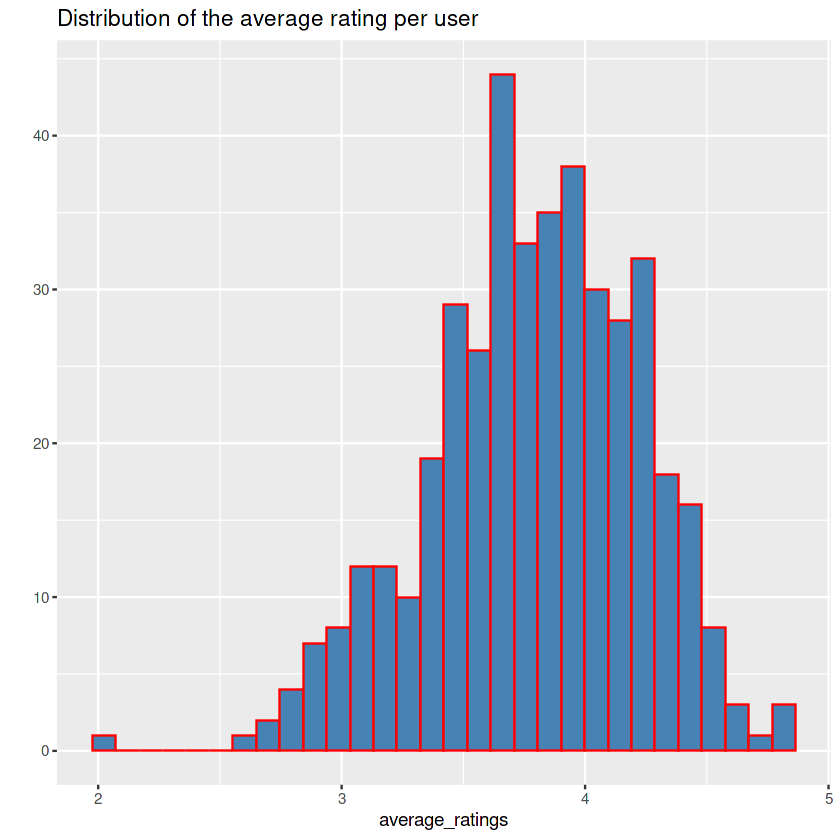

In [23]:
average_ratings <- rowMeans(movie_ratings)
qplot(average_ratings, fill=I("steelblue"), col=I("red")) +
  ggtitle("Distribution of the average rating per user")

# Data Normalization
- In the case of some users, there can be high ratings or low ratings provided to all of the watched films. This will act as a bias while implementing our model. In order to remove this, we normalize our data. Normalization is a data preparation procedure to standardize the numerical values in a column to a common scale value. This is done in such a way that there is no distortion in the range of values. Normalization transforms the average value of our ratings column to 0. We then plot a heatmap that delineates our normalized ratings.

In [24]:
normalized_ratings <- normalize(movie_ratings)
sum(rowMeans(normalized_ratings) > 0.00001)

[1] 0

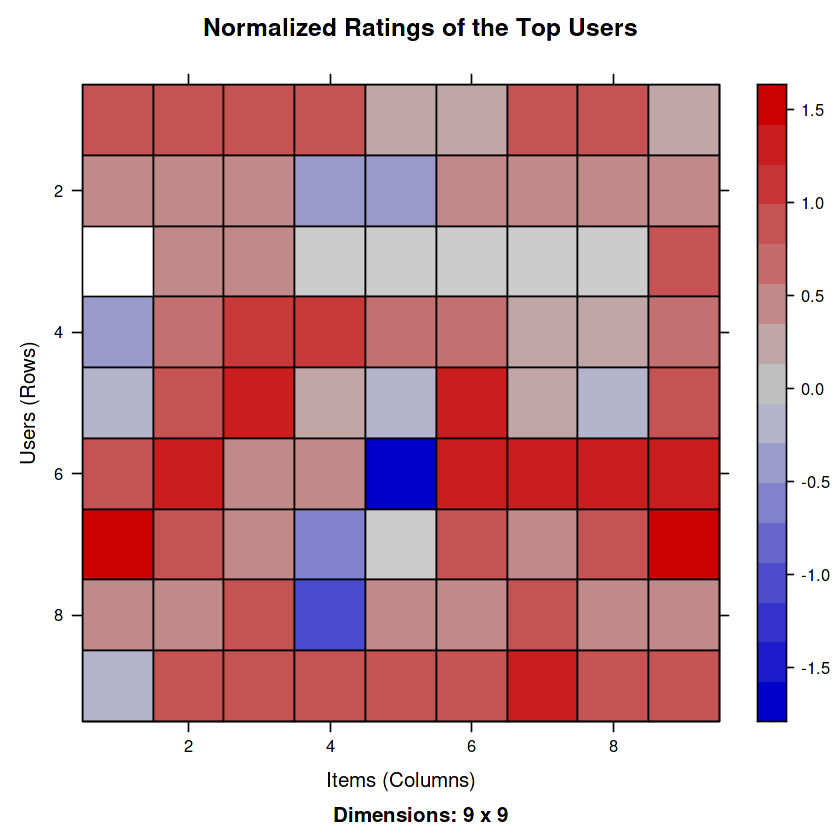

In [25]:
image(normalized_ratings[rowCounts(normalized_ratings) > minimum_movies,
                          colCounts(normalized_ratings) > minimum_users],
main = "Normalized Ratings of the Top Users")

# Performing Data Binarization
- In the final step of our data preparation in this data science project, we will binarize our data. Binarizing the data means that we have two discrete values 1 and 0, which will allow our recommendation systems to work more efficiently. We will define a matrix that will consist of 1 if the rating is above 3 and otherwise it will be 0.

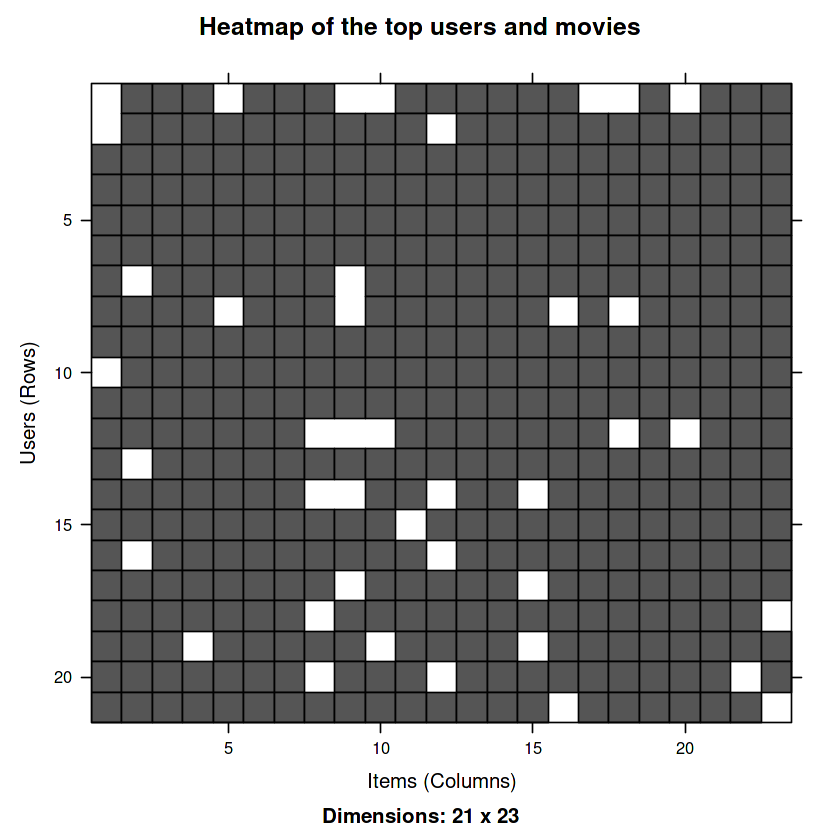

In [26]:
binary_minimum_movies <- quantile(rowCounts(movie_ratings), 0.95)
binary_minimum_users <- quantile(colCounts(movie_ratings), 0.95)
#movies_watched <- binarize(movie_ratings, minRating = 1)

good_rated_films <- binarize(movie_ratings, minRating = 3)
image(good_rated_films[rowCounts(movie_ratings) > binary_minimum_movies,
colCounts(movie_ratings) > binary_minimum_users],
main = "Heatmap of the top users and movies")

# Collaborative Filtering System
In this section of data science project, we will develop our very own Item Based Collaborative Filtering System. This type of collaborative filtering finds similarity in the items based on the people’s ratings of them. The algorithm first builds a similar-items table of the customers who have purchased them into a combination of similar items. This is then fed into the recommendation system.

The similarity between single products and related products can be determined with the following algorithm –

- For each Item i1 present in the product catalog, purchased by customer C.
- And, for each item i2 also purchased by the customer C.
- Create record that the customer purchased items i1 and i2.
- Calculate the similarity between i1 and i2.

We will build this filtering system by splitting the dataset into 80% training set and 20% test set.

In [27]:
sampled_data<- sample(x = c(TRUE, FALSE),
                      size = nrow(movie_ratings),
                      replace = TRUE,
                      prob = c(0.8, 0.2))
training_data <- movie_ratings[sampled_data, ]
testing_data <- movie_ratings[!sampled_data, ]

# Building the Recommendation System using R
- We will now explore the various parameters of our Item Based Collaborative Filter. These parameters are default in nature. In the first step, k denotes the number of items for computing their similarities. Here, k is equal to 30. Therefore, the algorithm will now identify the k most similar items and store their number. We use the cosine method which is the default one but you can also use pearson method.

In [28]:
recommendation_system <- recommenderRegistry$get_entries(dataType ="realRatingMatrix")
recommendation_system$IBCF_realRatingMatrix$parameters

$k
[1] 30

$method
[1] "Cosine"

$normalize
[1] "center"

$normalize_sim_matrix
[1] FALSE

$alpha
[1] 0.5

$na_as_zero
[1] FALSE

In [29]:
recommen_model <- Recommender(data = training_data,
                          method = "IBCF",
                          parameter = list(k = 30))
recommen_model

Recommender of type ‘IBCF’ for ‘realRatingMatrix’ 
learned using 330 users.

In [30]:
class(recommen_model)

[1] "Recommender"
attr(,"package")
[1] "recommenderlab"

Let us now explore our data science recommendation system model as follows –

Using the getModel() function, we will retrieve the recommen_model. We will then find the class and dimensions of our similarity matrix that is contained within model_info. Finally, we will generate a heatmap, that will contain the top 20 items and visualize the similarity shared between them.

In [31]:
model_info <- getModel(recommen_model)

class(model_info$sim)

[1] "dgCMatrix"
attr(,"package")
[1] "Matrix"

In [32]:
dim(model_info$sim)

[1] 447 447

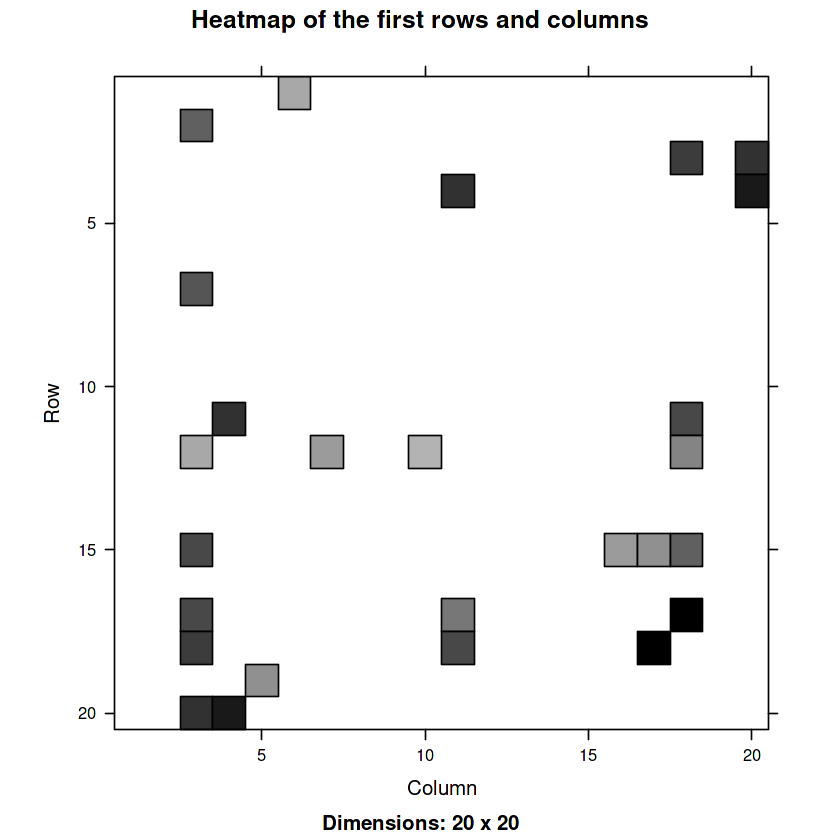

In [33]:
top_items <- 20
image(model_info$sim[1:top_items, 1:top_items],
   main = "Heatmap of the first rows and columns")

- In the next step of ML project, we will carry out the sum of rows and columns with the similarity of the objects above 0. We will visualize the sum of columns through a distribution as follows –

In [34]:
sum_rows <- rowSums(model_info$sim > 0)
table(sum_rows)

sum_rows
 30 
447 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



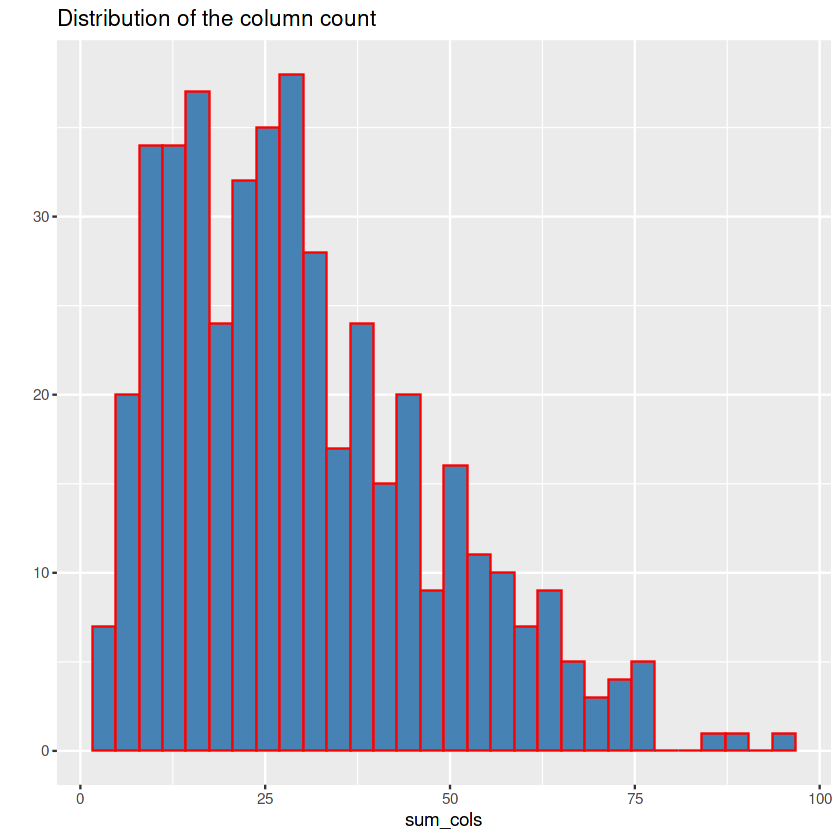

In [35]:
sum_cols <- colSums(model_info$sim > 0)
qplot(sum_cols, fill=I("steelblue"), col=I("red"))+ ggtitle("Distribution of the column count")

# How to build Recommender System on dataset using R?
We will create a top_recommendations variable which will be initialized to 10, specifying the number of films to each user. We will then use the predict() function that will identify similar items and will rank them appropriately. Here, each rating is used as a weight. Each weight is multiplied with related similarities. Finally, everything is added in the end.

In [36]:
top_recommendations <- 10 # the number of items to recommend to each user
predicted_recommendations <- predict(object = recommen_model,
                          newdata = testing_data,
                          n = top_recommendations)
predicted_recommendations

Recommendations as ‘topNList’ with n = 10 for 90 users. 

In [37]:
user1 <- predicted_recommendations@items[[1]] # recommendation for the first user
movies_user1 <- predicted_recommendations@itemLabels[user1]
movies_user2 <- movies_user1
for (index in 1:10){
  movies_user2[index] <- as.character(subset(movie_data,
                                         movie_data$movieId == movies_user1[index])$title)
}
movies_user2

[1] "Twelve Monkeys (a.k.a. 12 Monkeys) (1995)" 
 [2] "Clueless (1995)"                           
 [3] "Braveheart (1995)"                         
 [4] "Rumble in the Bronx (Hont faan kui) (1995)"
 [5] "Birdcage, The (1996)"                      
 [6] "Rob Roy (1995)"                            
 [7] "Casper (1995)"                             
 [8] "Congo (1995)"                              
 [9] "Die Hard: With a Vengeance (1995)"         
[10] "Legends of the Fall (1994)"

In [38]:
recommendation_matrix <- sapply(predicted_recommendations@items,
                      function(x){ as.integer(colnames(movie_ratings)[x]) }) # matrix with the recommendations for each user
#dim(recc_matrix)
recommendation_matrix[,1:4]

[,1] [,2]  [,3] [,4] 
 [1,]  32  60069 1265  1997
 [2,]  39    474 1275  5669
 [3,] 110   2000 2005  3578
 [4,] 112   1343 2985 59315
 [5,] 141   3897 3114  1704
 [6,] 151  48516   25  2858
 [7,] 158    110 1307   235
 [8,] 160     21 3052  2490
 [9,] 165    588 1527 68954
[10,] 266   1777 1183 48394

# Summary
Recommendation Systems are the most popular type of machine learning applications that are used in all sectors. They are an improvement over the traditional classification algorithms as they can take many classes of input and provide similarity ranking based algorithms to provide the user with accurate results. These recommendation systems have evolved over time and have incorporated many advanced machine learning techniques to provide the users with the content that they want.